<a href="https://colab.research.google.com/github/Archita14Singh/Task_2/blob/main/task2_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#Importing Maruti dataset:
maruti = pd.read_csv("/content/MARUTI.csv")
# View first few lines of training data
maruti.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,09-07-2003,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835530e+14,NaN,8537695.0,0.2428
1,10-07-2003,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,11-07-2003,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024620e+14,NaN,3014852.0,0.2568
3,14-07-2003,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064310e+14,NaN,1949217.0,0.3258
4,15-07-2003,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092000e+14,NaN,1307694.0,0.2118


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Data cleansing
maruti.drop(labels = {'Trades'}, axis = 1,inplace = True)

In [ ]:
maruti.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,09-07-2003,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835530e+14,8537695.0,0.2428
1,10-07-2003,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,4363947.0,0.4170
2,11-07-2003,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024620e+14,3014852.0,0.2568
3,14-07-2003,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064310e+14,1949217.0,0.3258
4,15-07-2003,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092000e+14,1307694.0,0.2118


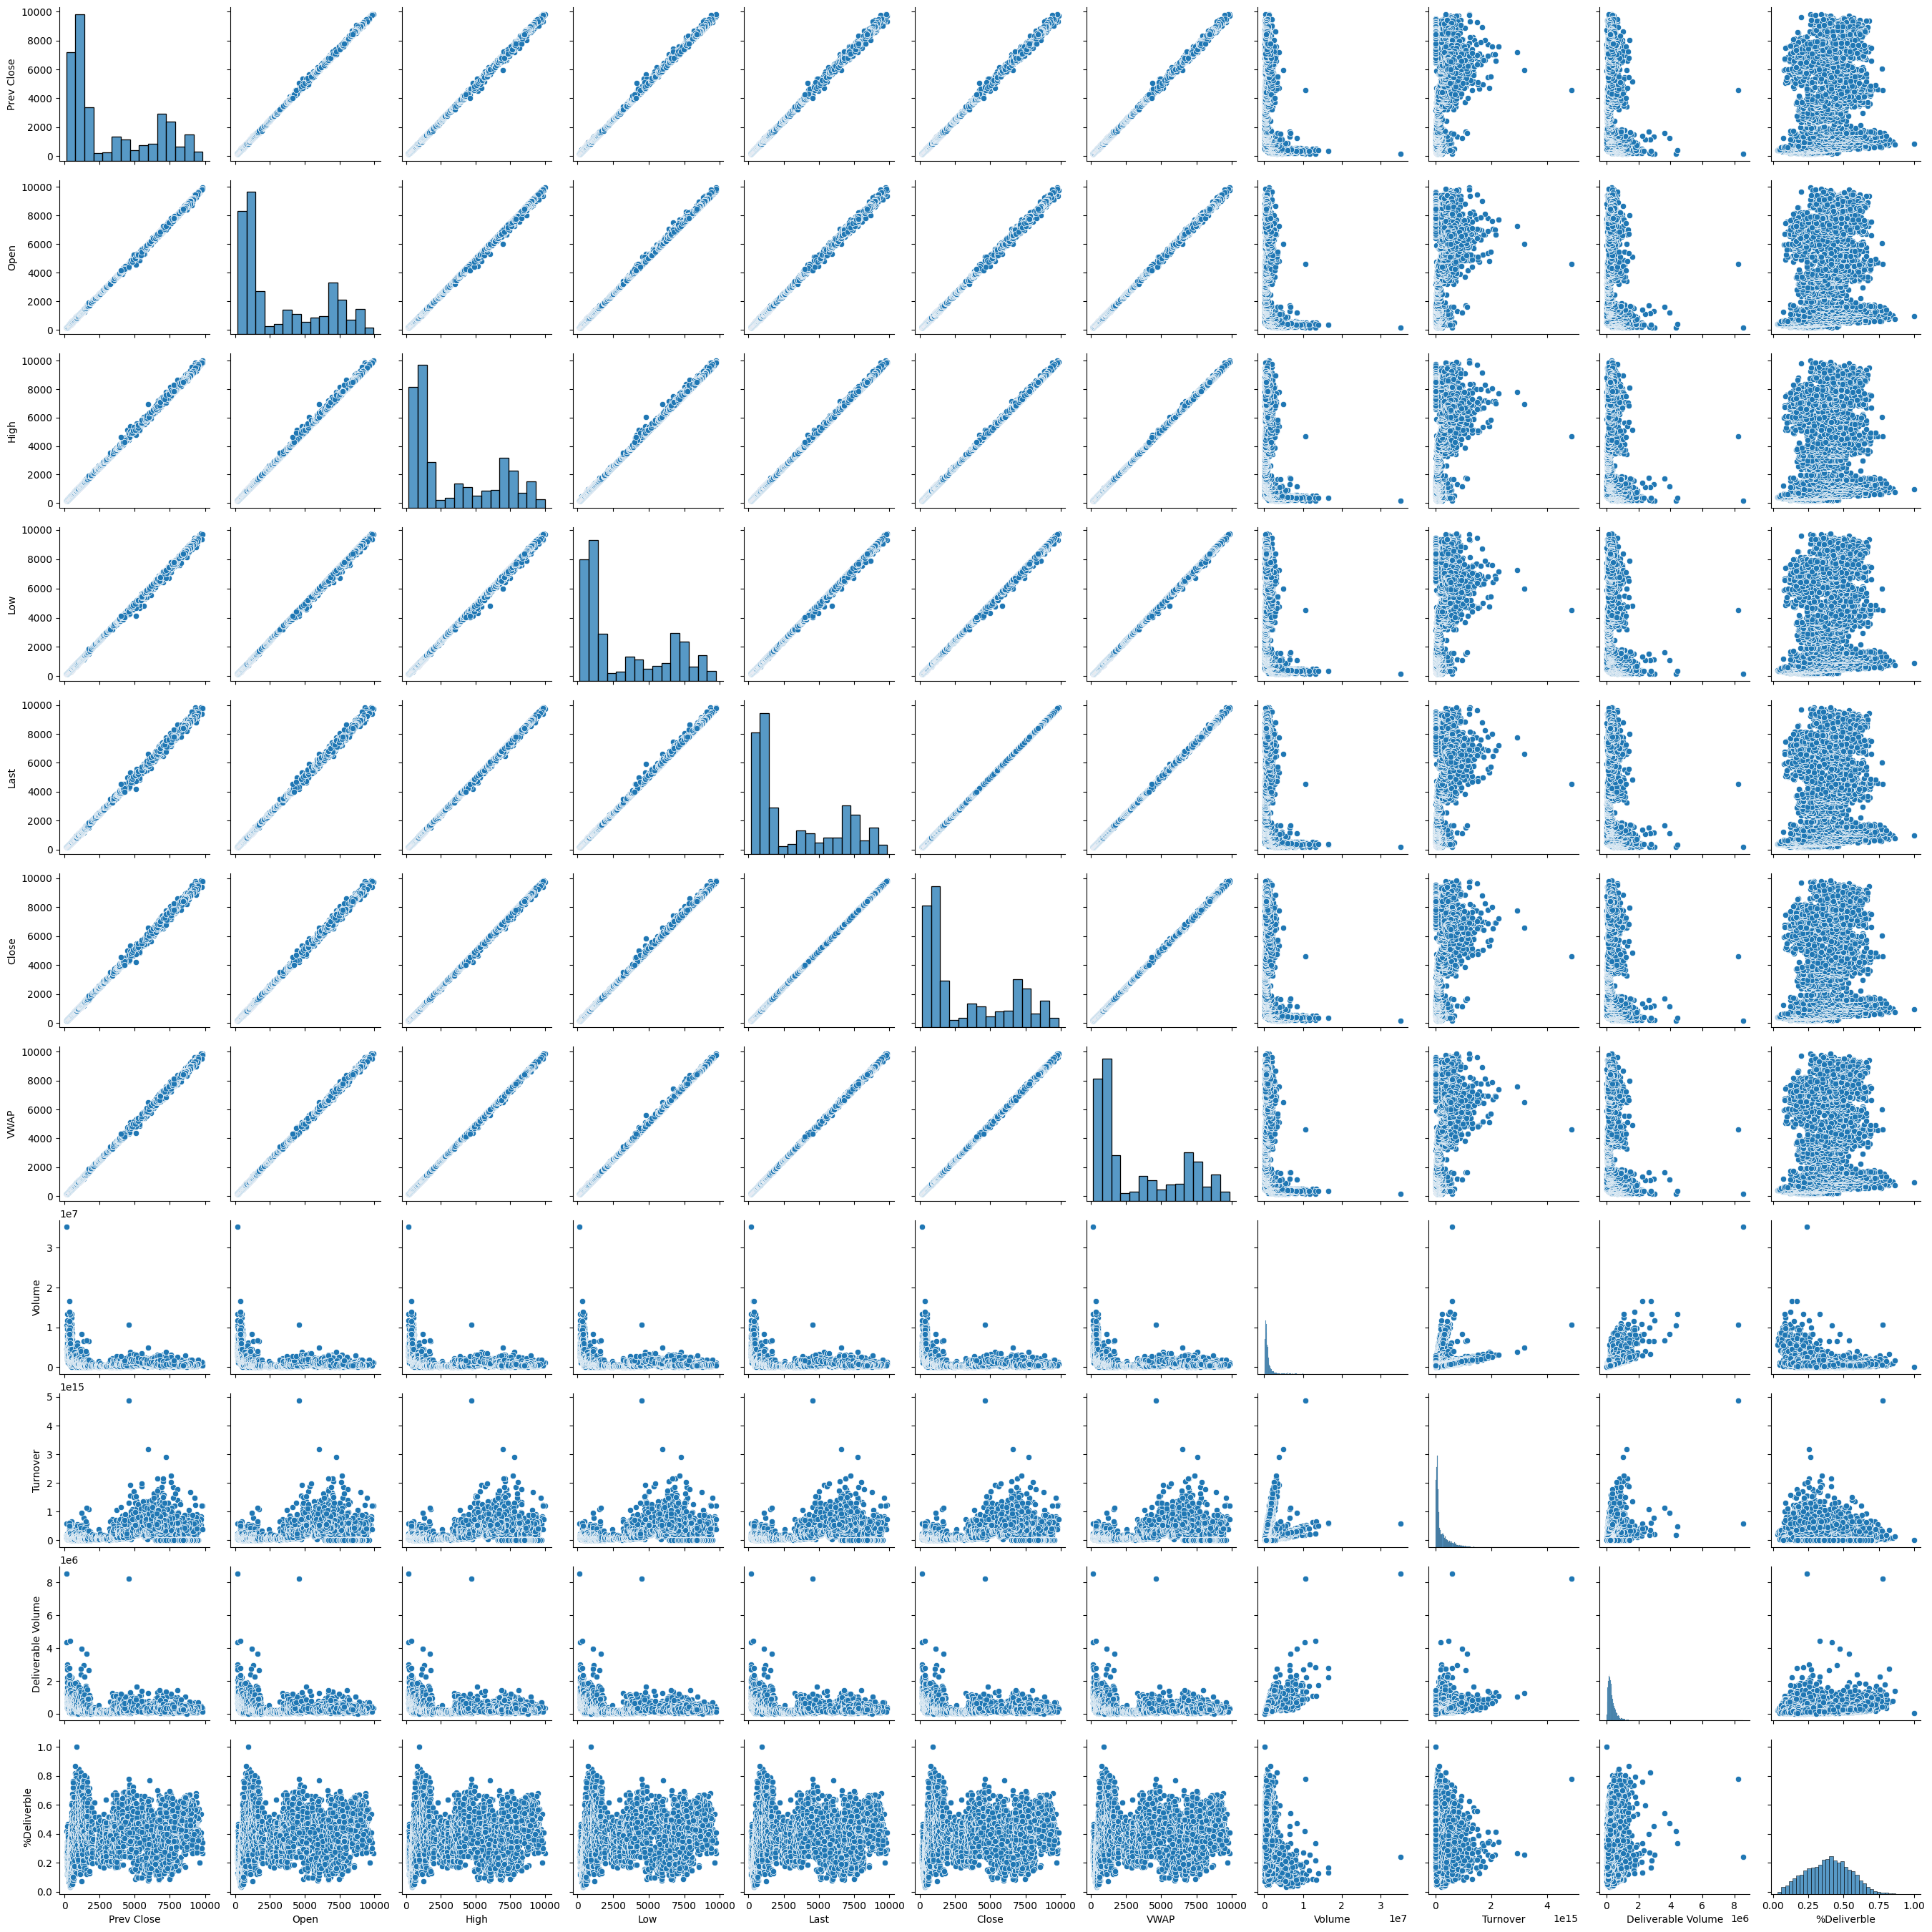

In [ ]:
sns.pairplot(maruti)

In [ ]:
#Printing a concise summary of the DataFrame
maruti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4843 non-null   object 
 1   Symbol              4843 non-null   object 
 2   Series              4843 non-null   object 
 3   Prev Close          4843 non-null   float64
 4   Open                4843 non-null   float64
 5   High                4843 non-null   float64
 6   Low                 4843 non-null   float64
 7   Last                4843 non-null   float64
 8   Close               4843 non-null   float64
 9   VWAP                4843 non-null   float64
 10  Volume              4843 non-null   int64  
 11  Turnover            4843 non-null   float64
 12  Deliverable Volume  4842 non-null   float64
 13  %Deliverble         4842 non-null   float64
dtypes: float64(10), int64(1), object(3)
memory usage: 529.8+ KB


In [ ]:
maruti['Deliverable Volume'] = maruti['Deliverable Volume'].fillna('ffill')
maruti['%Deliverble'] = maruti['%Deliverble'].fillna('ffill')

In [ ]:
maruti['Profit'] = maruti['Close'] - maruti['Open']

In [ ]:
maruti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4843 non-null   object 
 1   Symbol              4843 non-null   object 
 2   Series              4843 non-null   object 
 3   Prev Close          4843 non-null   float64
 4   Open                4843 non-null   float64
 5   High                4843 non-null   float64
 6   Low                 4843 non-null   float64
 7   Last                4843 non-null   float64
 8   Close               4843 non-null   float64
 9   VWAP                4843 non-null   float64
 10  Volume              4843 non-null   int64  
 11  Turnover            4843 non-null   float64
 12  Deliverable Volume  4843 non-null   object 
 13  %Deliverble         4843 non-null   object 
 14  Profit              4843 non-null   float64
dtypes: float64(9), int64(1), object(5)
memory usage: 567.7+

In [ ]:
X = maruti[['VWAP','Open', 'High', 'Low', 'Prev Close', 'Volume', 'Profit']]

In [ ]:
y = maruti[['Close']]

In [ ]:
X

,VWAP,Open,High,Low,Prev Close,Volume,Profit
0,165.95,164.90,170.40,155.00,125.00,35164283,-0.60
1,166.74,167.00,168.70,164.50,164.30,10464179,0.00
2,172.45,167.75,174.85,166.25,167.00,11740117,5.60
3,177.91,174.25,179.25,174.25,173.35,5982324,3.70
4,176.88,200.00,200.00,173.00,177.95,6173689,-23.80
...,...,...,...,...,...,...,...
4838,8222.45,8147.00,8346.00,8076.05,8141.60,315102,109.80
4839,8279.05,8298.95,8315.00,8230.80,8256.80,423308,6.50
4840,8405.36,8315.00,8453.50,8287.60,8305.45,538632,106.05
4841,8389.01,8370.00,8449.00,8333.00,8421.05,452134,65.80


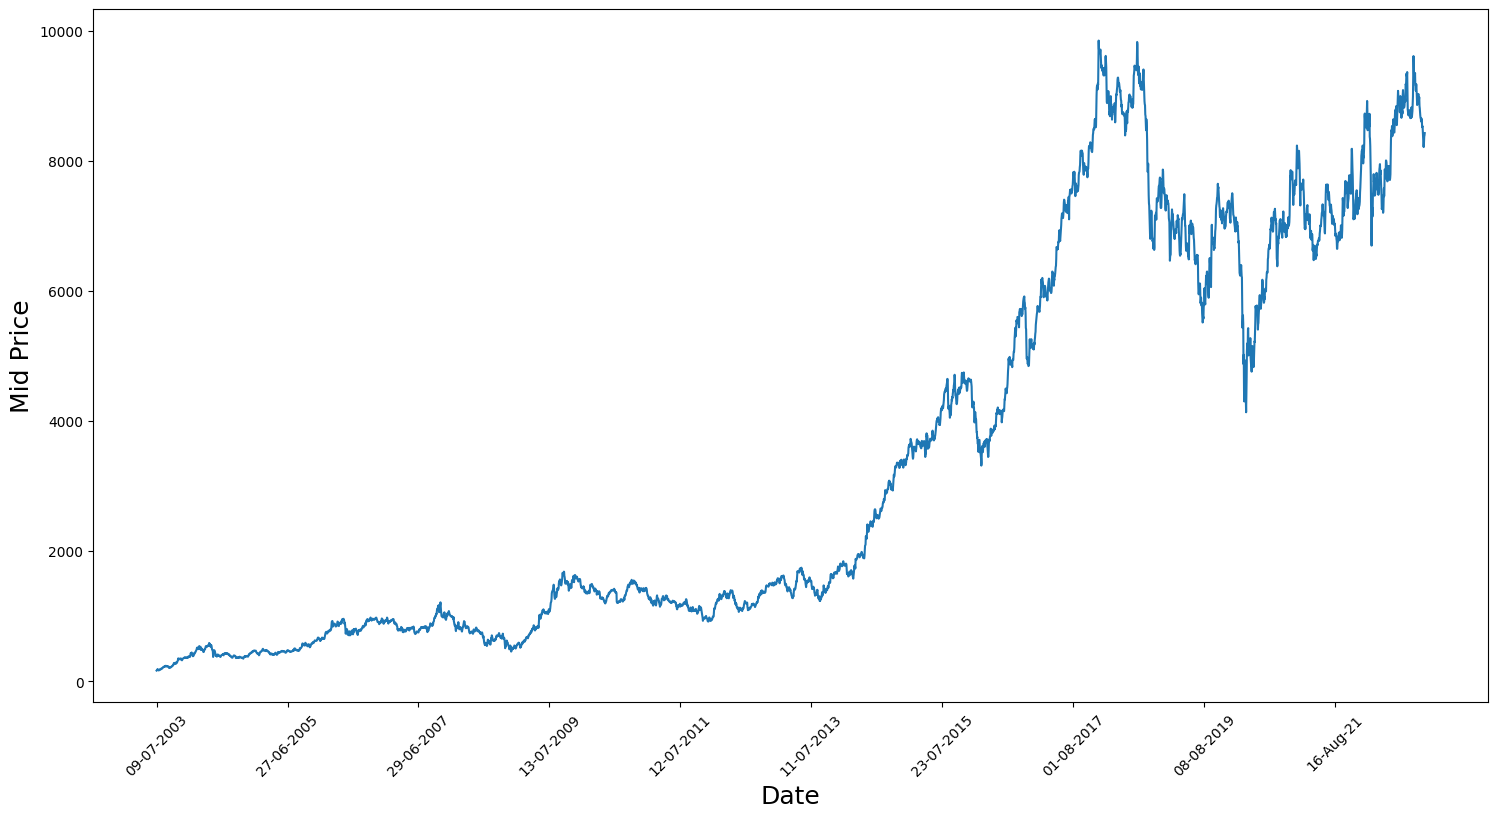

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(maruti.shape[0]),(maruti['Low']+maruti['High'])/2.0)
plt.xticks(range(0,maruti.shape[0],500),maruti['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

<Axes: >

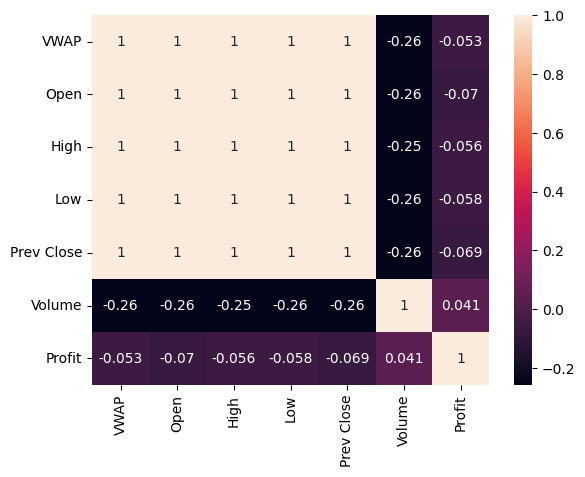

In [ ]:
sns.heatmap(X.corr(), annot = True)

In [ ]:
y

,Close
0,164.30
1,167.00
2,173.35
3,177.95
4,176.20
...,...
4838,8256.80
4839,8305.45
4840,8421.05
4841,8435.80


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size = 0.2)

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0.10256455 0.10334626 0.10259776 ... 0.10713421 0.01425065 0.45469129]
 [0.94938312 0.95092838 0.94796341 ... 0.95905207 0.01941944 0.28945543]
 [0.12231491 0.12252602 0.1220021  ... 0.12865377 0.01340111 0.44758065]
 ...
 [0.09922878 0.09855132 0.09821728 ... 0.10273038 0.00584491 0.46370968]
 [0.37750132 0.37094471 0.37397356 ... 0.38063034 0.01521885 0.47879813]
 [0.25328364 0.24750051 0.25349777 ... 0.25351663 0.01302469 0.5170829 ]]
[[0.10590756 0.10581514 0.10605737 ... 0.11235185 0.01236814 0.466658  ]
 [0.70525196 0.68985921 0.7002961  ... 0.69913314 0.01903101 0.56269511]
 [0.29273067 0.29422567 0.29642744 ... 0.3026387  0.01397343 0.40196844]
 ...
 [0.02068677 0.02008774 0.02057959 ... 0.02372405 0.08989076 0.4760666 ]
 [0.71197617 0.70313201 0.70629954 ... 0.71169566 0.01640705 0.45768297]
 [0.76878452 0.75862069 0.7611547  ... 0.76678221 0.01272846 0.46587756]]
[[0.10306522]
 [0.94267259]
 [0.12166237]
 ...
 [0.09927959]
 [0.37724384]
 [0.25665717]]
[[1.06995651e-01]
 [7.

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3874, 7)
(969, 7)
(3874, 1)
(969, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)
print("Training_Score:",model1.score(X_train, y_train)*100)
print("Testing_score :",model1.score(X_test, y_test)*100)

Training_Score: 100.0
Testing_score : 100.0


In [ ]:
import tensorflow as tf
from keras import layers
model = tf.keras.models.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.LSTM(128))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 164106 (641.04 KB)
Trainable params: 164106 (641.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train,y_train,epochs = 50, batch_size = 125, validation_split=0.2)

Epoch 1/50
25/25 [==============================] - 5s 49ms/step - loss: 0.1243 - val_loss: 0.1014
Epoch 2/50
25/25 [==============================] - 1s 27ms/step - loss: 0.0965 - val_loss: 0.0962
Epoch 3/50
25/25 [==============================] - 1s 30ms/step - loss: 0.0947 - val_loss: 0.0951
Epoch 4/50
25/25 [==============================] - 1s 27ms/step - loss: 0.0943 - val_loss: 0.0954
Epoch 5/50
25/25 [==============================] - 1s 48ms/step - loss: 0.0947 - val_loss: 0.0957
Epoch 6/50
25/25 [==============================] - 1s 47ms/step - loss: 0.0943 - val_loss: 0.0951
Epoch 7/50
25/25 [==============================] - 1s 48ms/step - loss: 0.0947 - val_loss: 0.0974
Epoch 8/50
25/25 [==============================] - 1s 38ms/step - loss: 0.0947 - val_loss: 0.0950
Epoch 9/50
25/25 [==============================] - 1s 26ms/step - loss: 0.0942 - val_loss: 0.0958
Epoch 10/50
25/25 [==============================] - 1s 27ms/step - loss: 0.0947 - val_loss: 0.0951
Epoch 11/

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

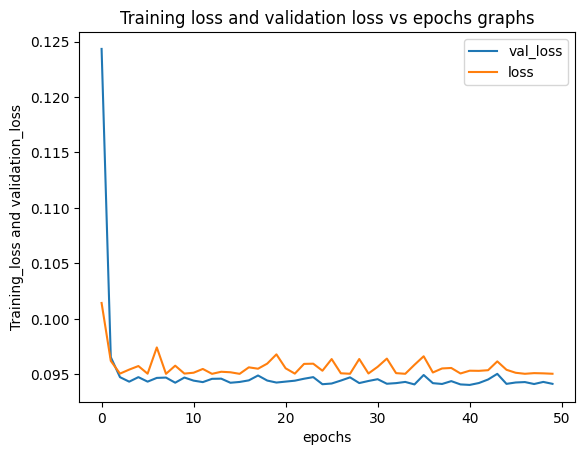

In [ ]:
eh = epochs_hist.history['loss']
eh2 = epochs_hist.history['val_loss']
plt.plot(eh)
plt.plot(eh2)
plt.title('Training loss and validation loss vs epochs graphs')
plt.xlabel('epochs')
plt.ylabel('Training_loss and validation_loss')
plt.legend({'loss', 'val_loss'})

In [ ]:
# using LSTM model
y_predict = model.predict(X_test)

31/31 [==============================] - 1s 9ms/step


In [ ]:
#values predicted byt LSTM model
y_predict

array([[0.33375397, 0.32966807, 0.3312794 , ..., 0.33252698, 0.33368936,
        0.33251333],
       [0.33375397, 0.32966807, 0.3312794 , ..., 0.33252698, 0.33368936,
        0.33251333],
       [0.33375397, 0.32966807, 0.3312794 , ..., 0.33252698, 0.33368936,
        0.33251333],
       ...,
       [0.33375397, 0.3296681 , 0.3312794 , ..., 0.332527  , 0.33368942,
        0.33251327],
       [0.33375397, 0.3296681 , 0.3312794 , ..., 0.332527  , 0.33368942,
        0.33251327],
       [0.33375397, 0.3296681 , 0.3312794 , ..., 0.332527  , 0.33368942,
        0.33251327]], dtype=float32)

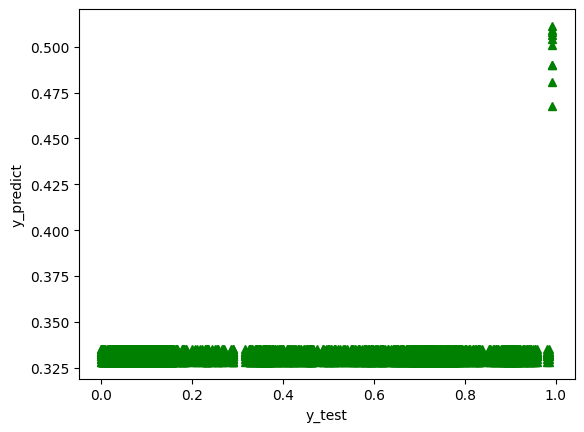

In [ ]:
plt.plot(y_test, y_predict, '^', color = 'g')
plt.xlabel('y_test')
plt.ylabel('y_predict');

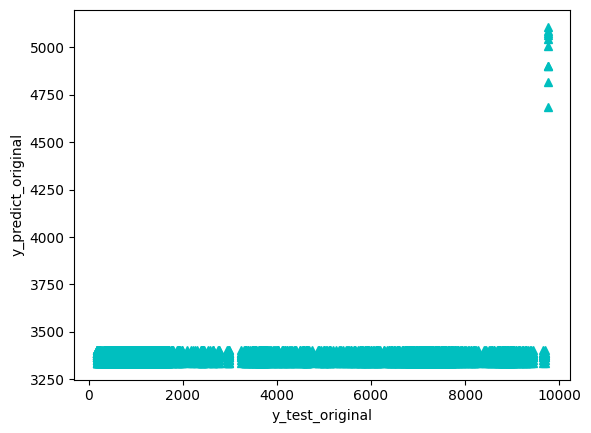

In [ ]:
y_predict_original = scaler.inverse_transform(y_predict)
y_test_original = scaler.inverse_transform(y_test)
plt.plot(y_test_original,y_predict_original, '^', color = 'c');
plt.xlabel('y_test_original')
plt.ylabel('y_predict_original');

In [ ]:
#Using linear regression model
y_predict = model1.predict(X_test)

Text(0, 0.5, 'y_predict')

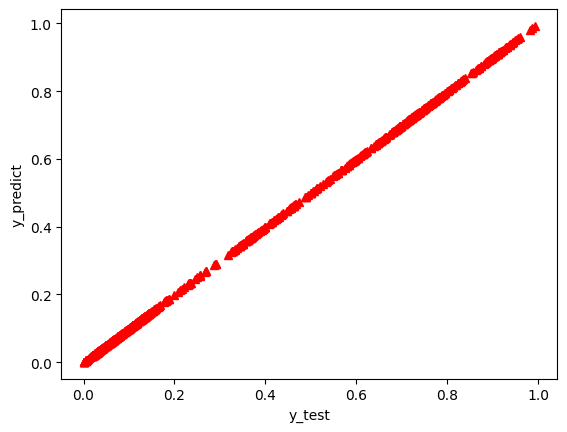

In [ ]:
plt.plot(y_test, y_predict, '^', color = 'r')
plt.xlabel('y_test')
plt.ylabel('y_predict')

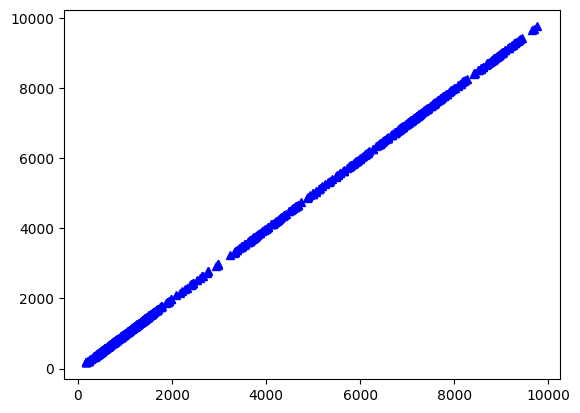

In [ ]:
y_predict_original = scaler.inverse_transform(y_predict)
y_test_original = scaler.inverse_transform(y_test)
plt.plot(y_test_original,y_predict_original, '^', color = 'b')

In [ ]:
k = X_test.shape
n = len(X_test)
print('value of n:',n)

value of n: 969


In [ ]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test_original, y_predict_original)), '0.3f'))
RMSE

0.0

In [ ]:
MSE = mean_squared_error(y_test_original,y_predict_original)
print("Mean_squared_error:",MSE)

Mean_squared_error: 2.767461162634209e-23


In [ ]:
MAE = mean_absolute_error(y_test_original,y_predict_original)
print("Mean_absolute_error:",MAE)

Mean_absolute_error: 5.218243450003867e-12


In [ ]:
r2 = r2_score(y_test_original,y_predict_original)
print("r2_score:",(r2*100))

r2_score: 100.0
